# Kỹ thuật tăng cường tương phản ảnh
Trong phần này học viên cần thực hiện:
- Cài đặt phương pháp hiệu chỉnh gama trên ảnh đa mức xám
- Thực hiện tăng cường độ tương phản trên ảnh màu với các chiến lược tăng cường độ tương phản khác nhau (histogram equalization, hiệu chỉnh gama, kéo giãn histogram, ...)
- Cân bằng động histogram (dynamic histogram equalization)

# 0. Ảnh thực hành

In [1]:
import cv2
import matplotlib.pyplot as plt
import os

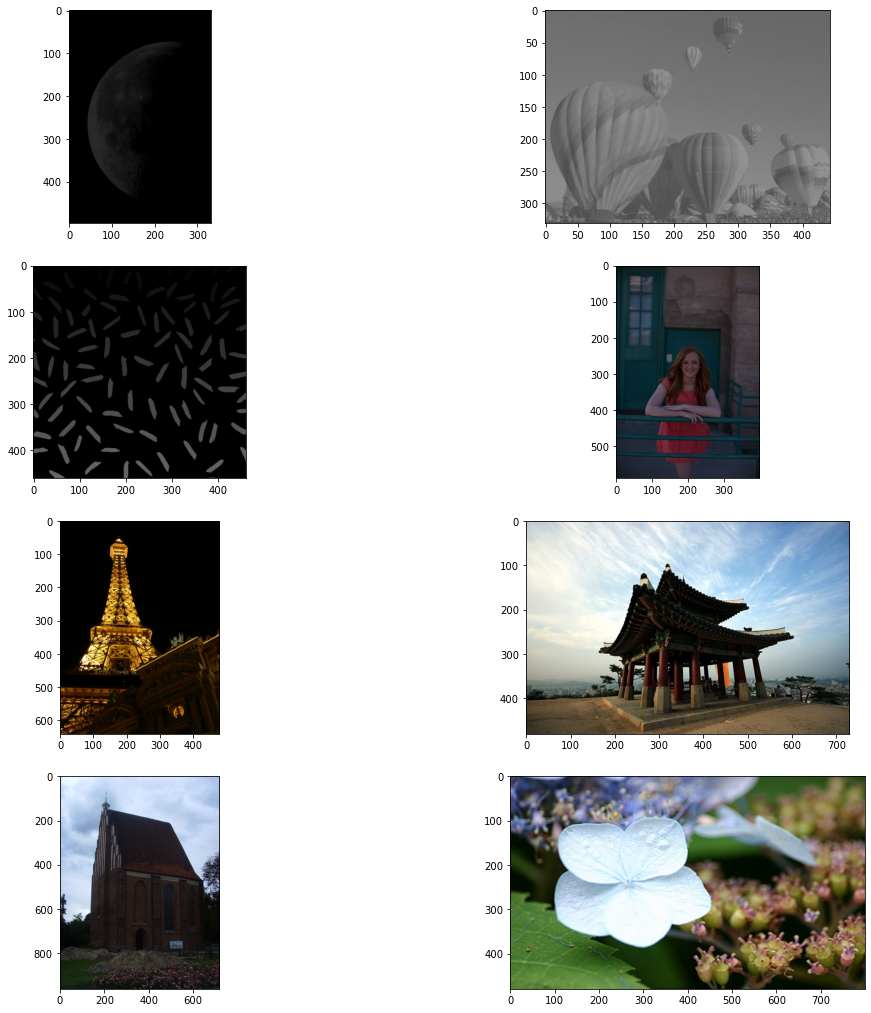

In [2]:
img_names = os.listdir('testdata/')
plt.figure(figsize=(18, 18)) 
for i, img_name in enumerate(img_names):
    img = cv2.imread(os.path.join('testdata', img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # for showing purpose
    plt.subplot(4,2,i+1)
    plt.imshow(img) 
plt.show()

# 1. Cài đặt phương hàm hiệu chỉnh gama trên ảnh đa mức xám

## Gamma Correction

\begin{align}{O = \left( \frac{I}{255} \right)^{\gamma} \times 255}
\end{align}

Với γ<1, các cùng ảnh ban đầu bị tối sẽ được tăng sáng và histogram sẽ có xu hướng dịch chuyển sang phải, ngược lại với γ>1, ảnh sẽ được giảm sáng.

gamma_correction(image, gamma=gamma)

In [3]:
from IPython.display import Image
from matplotlib.colors import NoNorm

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

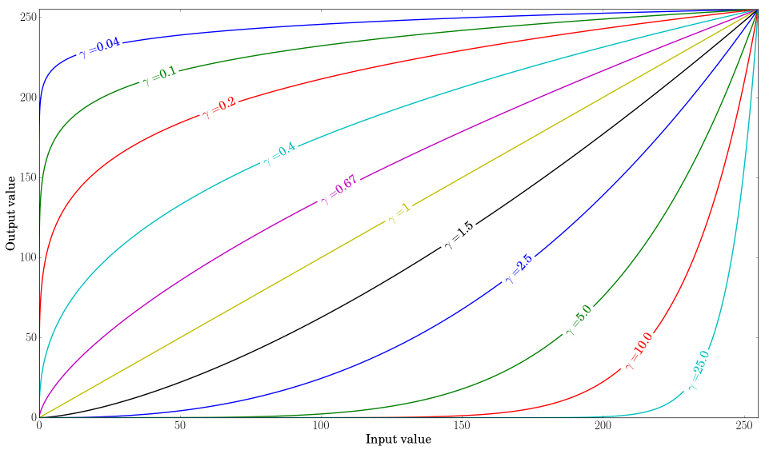

In [4]:
Image('images/Gamma_Correction.png')

In [44]:
def gamma_correction(img, gamma): #img: gray image
    ### YOUR CODE HERE ###
    img_f = np.array(img,np.float16)
    
    #print(img_f.shape)
    img_gama = (img_f/255)**gamma*255
    
    img_gama = np.array(img_gama,np.uint8)
    #print(img_gama)
    ### YOUR CODE HERE ###
    return img_gama

## Thực hiện thử nghiệm với giá trị tham số khác nhau trên các ảnh tương ứng thư mục testdata để tìm tham số tốt cho các bức ảnh trong đó

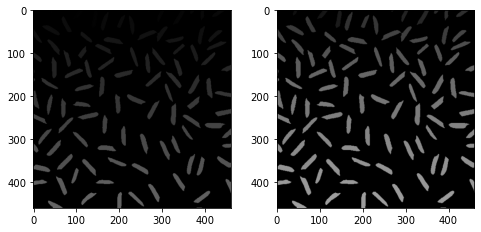

In [46]:
### YOUR CODE HERE ###
# đọc ảnh vào
path = 'testdata/gao3.png'
img = cv2.imread(path)
img_f = img
f = open('out.txt','w')
# for i in range(img_f.shape[0]):
#     for j in range(img_f.shape[1]):
#         for k in range(img_f.shape[2]):
#             f.write(str(img[i,j,k]))
#             #f.write(' '.join(str(e) for e in (i,j,k)))
#         f.write('\n')
#     f.write('\n')
# áp dụng hàm
img_gama = gamma_correction(img,gamma = 0.5)
### YOUR CODE HERE ###

# Show the images
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.imshow(img, cmap='gray', norm=NoNorm())

plt.subplot(222)
plt.imshow(img_gama, cmap='gray', norm=NoNorm())
plt.show()

# 2. Cân bằng Histogram và hiệu chỉnh gama trên ảnh màu

# Yêu cầu 1
Hoàn thiện hàm EqHist để tăng cường độ tương phản cho ảnh đầu vào với trường hợp ảnh đầu vào (ảnh màu hoặc ảnh đa mức xám). Lưu ý việc sử dụng không gian màu phù hợp khi làm việc với ảnh màu. Học viên cần thử làm việc với không gian màu và so sánh kết quả thu được.

In [49]:
def EqHist(img):
    # if input image is gray image
    if(len(img.shape)==2):
        outImg = cv2.equalizeHist(img)
    else:
        img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
        img_hsv[:,:,2] = cv2.equalizeHist(img_hsv[:,:,2])
        outImg = cv2.cvtColor(img_hsv,cv2.COLOR_HSV2BGR)
    # if input image is color image
          
    ### YOUR CODE HERE ###
     
    ### YOUR CODE HERE ###

    return outImg

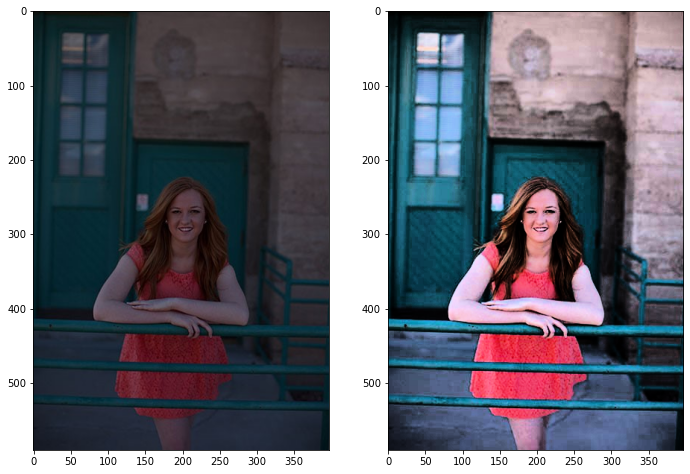

In [50]:
## Thực hiện cân bằng histogram trên ảnh màu

#img = cv2.imread('testdata/z01.jpg')
#img = cv2.imread('testdata/z03.jpg')
img = cv2.imread('testdata/girl1_dark.jpg')
img_eq = EqHist(img)

plt.figure(figsize=(18, 18)) 
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(img_eq, cv2.COLOR_BGR2RGB))

plt.show()

# Yêu cầu 2
Hoàn thiện hàm Gamma để tăng cường độ tương phản cho ảnh đầu vào với trường hợp ảnh đầu vào (ảnh màu hoặc ảnh đa mức xám). Lưu ý việc sử dụng không gian màu phù hợp khi làm việc với ảnh màu. Học viên cần thử làm việc với không gian màu và so sánh kết quả thu được.

In [59]:
# input: ảnh (gray or color), gamma: tham số hiệu chỉnh
# ouput: ảnh được hiệu chỉnh (gray or color)
def Gamma(img,gamma):
    ### YOUR CODE HERE ###
    if(len(img.shape)==2):
        outImg = gamma_correction(img,gamma)
    else:
        img_gamma = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
        img_gamma[:,:,2] = gamma_correction(img_gamma[:,:,2],gamma)
        outImg = cv2.cvtColor(img_gamma,cv2.COLOR_HSV2BGR)
    
    ### YOUR CODE HERE ###

    return outImg

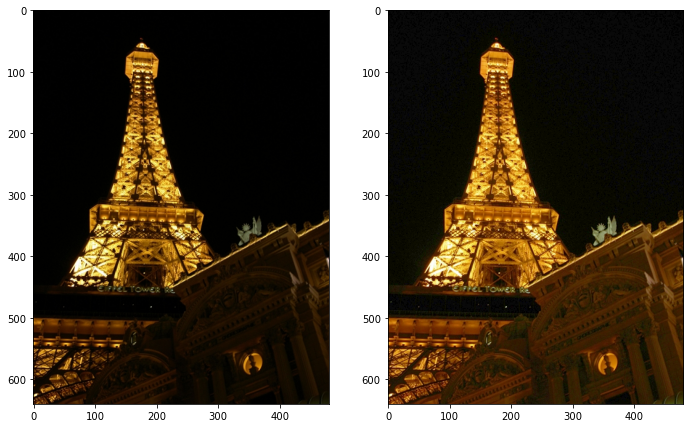

In [62]:
## Thực hiện và đánh giá hiệu chỉnh gama trên ảnh màu

img = cv2.imread('testdata/z01.jpg')
#img = cv2.imread('testdata/z03.jpg')
#img = cv2.imread('testdata/girl1_dark.jpg')

gama = 0.6 # hệ số hiệu chỉnh
img_gamma = Gamma(img,gama)

plt.figure(figsize=(18, 18)) 
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(img_gamma, cv2.COLOR_BGR2RGB))

plt.show()

# Yêu cầu 3: lựa chọn phương án học viên được cho là tốt trong các phương án được phân tích ở yêu cầu 1 và 2

### Phân tích và lựa chọn phương án
Học viên cần lựa chọn phương án tốt nhất trong số các phương án được phân tích ở yêu cầu 2. Hãy sử dụng hình ảnh kết quả thu được minh chứng cho lựa chọn của học viên. Khuyến khích dùng lập luận bổ sung cho các minh chứng trên kết quả thực nghiệm.


Nội dung phân tích đặt ở đây! 
Code minh họa cho kết quả phân tích có thể để trước hoặc sau


### Phân tích 2 phương pháp

Ta thấy gamma correction với gamma nhỏ hơn 1 có thể hoạt động tốt để làm sáng ảnh khi ảnh đang bị tối. Điểm mạnh của gamma correction so với cân bằng histogram đó là ta có thể điều khiển được sự hoạt động của hàm bằng cách tinh chỉnh tham số gamma.

Tuy nhiên trong đa số các trường hợp mà cái ta quan tâm chủ yếu là tăng độ tương phản cho ảnh, thì cân bằng histogram thường cho ra kết quả tốt hơn, lý do là vì miền giá trị của kênh độ sáng của ảnh thường được trải rộng hơn so với gamma correction <br>
Ví dụ đối với các ảnh trên ví dụ: <br>
Ta sử dụng gamma correction với gamma nhỏ hơn 1 thì ảnh chỉ đơn giản là có xu hướng tăng độ sáng lên, chứ phương pháp này không thực sự quan tâm tới tính tương phản cho ảnh. <br>
Còn đối với cân bằng histogram đối với ảnh cô gái ở trên, thì bản thân trong thuật toán của phương pháp này tạo ra hệ quả trực tiếp luôn dẫn tới sự phân bố của giá trị kênh muốn cân bằng tăng lên (ở đây là kênh value) nên dẫn tới việc ảnh được tạo ra bởi cân bằng histogram thường có độ tương phản tốt hơn gamma correction

### Do đó ta sẽ chọn cân bằng histogram để sử dụng cho tăng cường tương phản cho ảnh

### Kết quả trên tập ảnh trong testdata với phương án được lựa chọn
- Lấy danh sách tên ảnh trong thư mục testdata
- Loop qua từng ảnh, đọc ảnh và thực hiện tăng cường độ tương phản với giải pháp lựa chọn
- Hiển thị ảnh kết quả

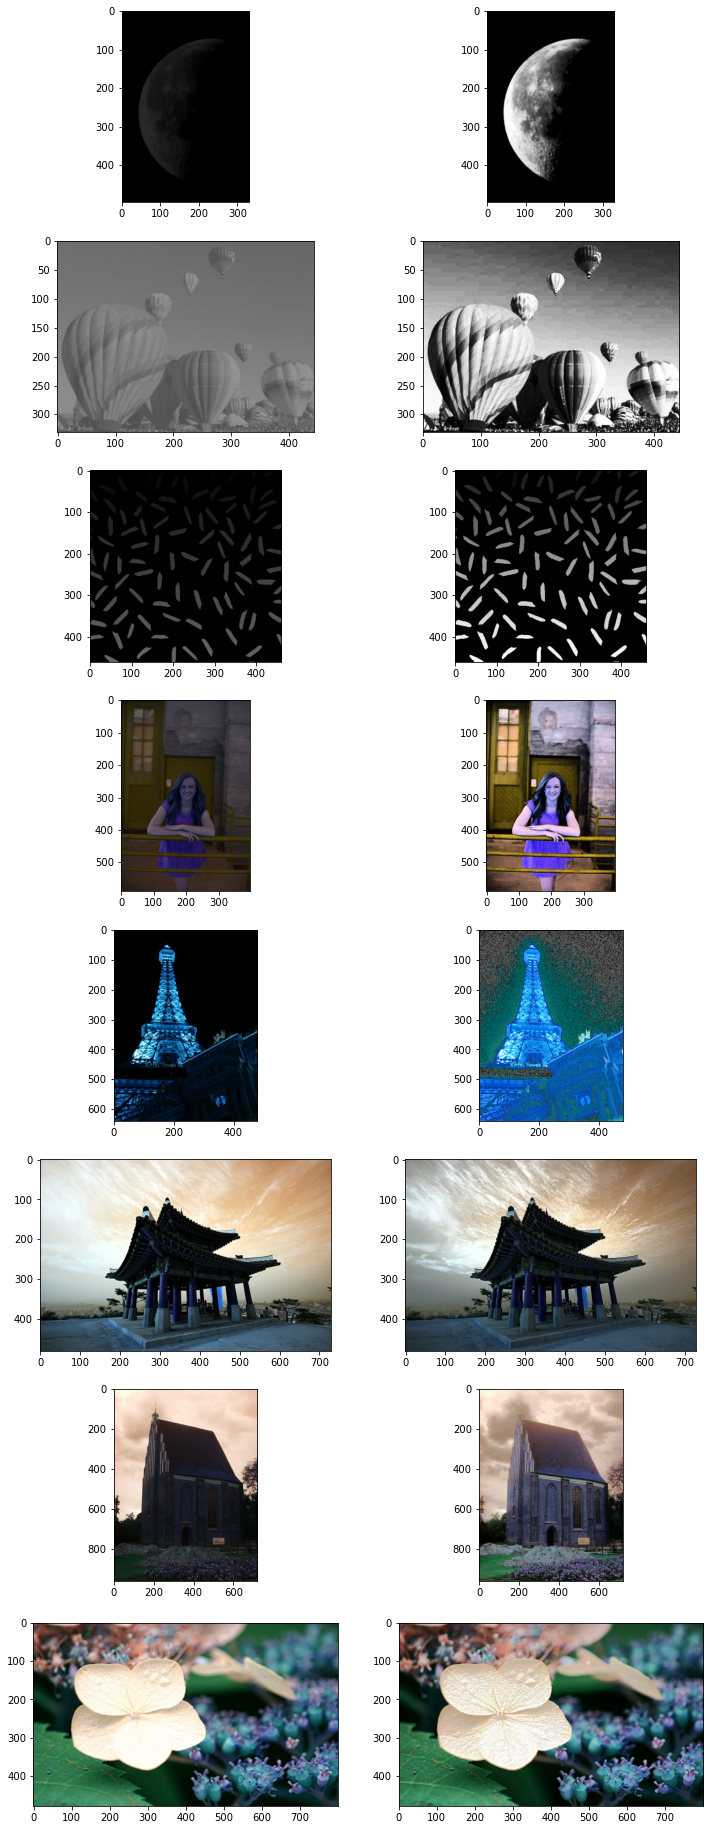

In [79]:
### YOUR CODE HERE ###
import glob
path = 'testdata/*.*'
paths = glob.glob(path)
num = len(path)
i = -1
plt.figure(figsize=(12,50))
for path in paths:
    i += 1
    img = cv2.imread(path)
    img_e = EqHist(img)
    plt.subplot(num,2,i*2+1)
    plt.imshow(img)
    plt.subplot(num,2,i*2+2)
    plt.imshow(img_e)
### YOUR CODE HERE ###